In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
# Normalize pixel values to [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape to include channel dimension (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [9]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.1,
                    verbose=2)

Epoch 1/5
844/844 - 11s - 13ms/step - accuracy: 0.9469 - loss: 0.1744 - val_accuracy: 0.9852 - val_loss: 0.0590
Epoch 2/5
844/844 - 6s - 7ms/step - accuracy: 0.9842 - loss: 0.0514 - val_accuracy: 0.9858 - val_loss: 0.0440
Epoch 3/5
844/844 - 4s - 5ms/step - accuracy: 0.9894 - loss: 0.0356 - val_accuracy: 0.9902 - val_loss: 0.0343
Epoch 4/5
844/844 - 4s - 5ms/step - accuracy: 0.9917 - loss: 0.0264 - val_accuracy: 0.9917 - val_loss: 0.0314
Epoch 5/5
844/844 - 4s - 5ms/step - accuracy: 0.9936 - loss: 0.0189 - val_accuracy: 0.9913 - val_loss: 0.0338


Test Accuracy: 0.9907
Test Loss: 0.0331


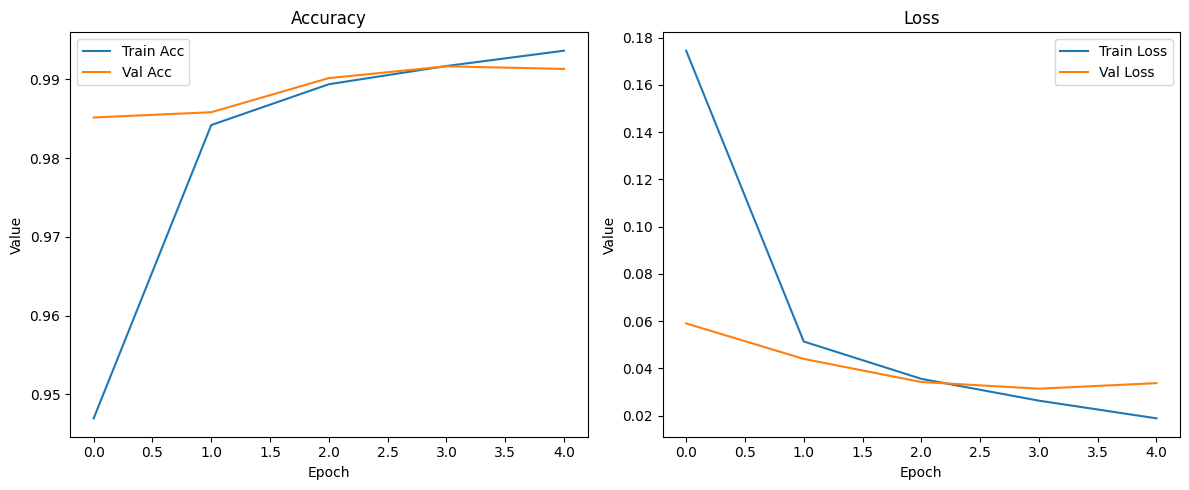

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()
